In [305]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [306]:
def periodically_continued(start, end):
    interval = end - start
    return lambda f: lambda x: f((x - start) % interval + start)

In [307]:
def compute_coefficients(func, T, h=0, steps=10):
    w_n = lambda n: (2 * np.pi * n) / T

    a_0 = ((1 / T) * scipy.integrate.quad(func, 0, 2*T)[0])
    coeffs = [
        [(2 / T) * scipy.integrate.quad(
            lambda x, n, f: f(x) * np.cos(w_n(n) * x),
            h, h + T, args=(n, func)
        )[0],
        (2 / T) * scipy.integrate.quad(
            lambda x, n, f: f(x) * np.sin(w_n(n) * x),
            h, h + T, args=(n, func)
        )[0]]

        for n in range(1, steps)
    ]

    return a_0, coeffs


def compute_furier(x, a_0, coeffs, T):
    w_n = lambda n: (2 * np.pi * n) / T

    result = a_0 / 2
    for n, (a_n, b_n) in enumerate(coeffs):
        result += a_n * np.cos(w_n(n + 1) * x) + \
                + b_n * np.sin(w_n(n + 1) * x)

    return result

In [308]:
def compute_comp_coefficients(func, T, h=0, N=5):
    w_n = lambda n: (2 * np.pi * n) / T 
    int_function = lambda t, f, w: \
        f(t) * np.exp(complex(0, -w*t))
    
    real_function = lambda t, f, w: int_function(t, f, w).real
    imag_function = lambda t, f, w: int_function(t, f, w).imag

    c_n = np.array([], dtype=np.complex128)
    for n in range(-N, N + 1):
        real_integral = (1 / T) * scipy.integrate.quad(
            real_function,
            h, h + T, args=(func, w_n(n))
        )[0]
        imag_integral = (1 / T) * scipy.integrate.quad(
            imag_function,
            h, h + T, args=(func, w_n(n))
        )[0]

        c_n = np.append(c_n, real_integral + 1j*imag_integral)

    return c_n

def compute_comp_fourier(t, c_n, T):
    w_n = lambda n: (2 * np.pi * n) / T
    N = len(c_n) // 2

    result = complex(0, 0)
    for i, n in enumerate(range(-N, N + 1)):
        result += c_n[i] * np.exp(complex(0, w_n(n)) * t)

    return result

## Task 1

In [309]:
a, b = 2, 5
t_0, t_1, t_2 = 1, 4, 12
T = t_2 - t_0

x_values = np.linspace(-5, 20, 1_000)

### Square wave

In [310]:
@periodically_continued(t_0, t_2)
def square_wave(x):
    if t_0 <= x < t_1:
        return a
    return b

In [311]:
sw = np.array([
    square_wave(x)
    for x in x_values
], dtype=np.float64)

sw[:-1][np.abs(np.diff(sw)) >= 0.5] = np.nan

In [312]:
a_0, coeffs = compute_coefficients(square_wave, T, h=t_0, steps=21)
sw_fourier = compute_furier(
    x_values, a_0, coeffs, T
)

In [313]:
comp_coeffs = compute_comp_coefficients(square_wave, T, h=t_0, N=20)
sw_comp_fourier = compute_comp_fourier(
    x_values, comp_coeffs, T
)

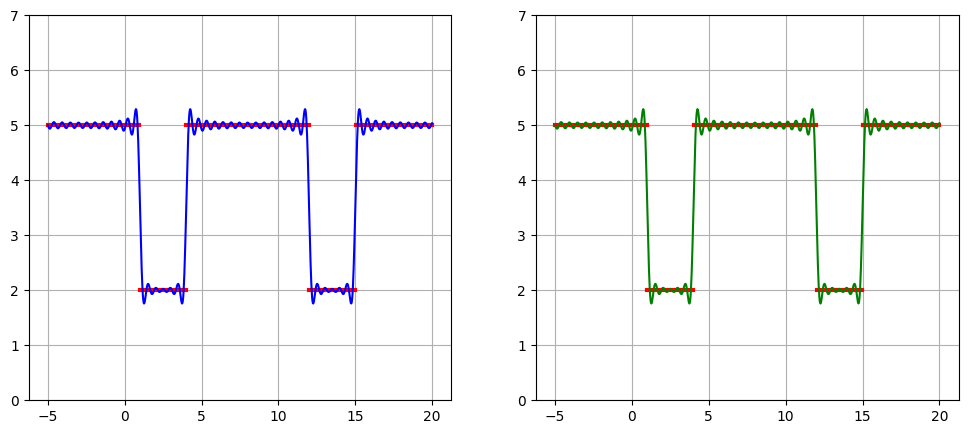

In [314]:
_, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(x_values, sw, color='red', linewidth=3)
axis[0].plot(x_values, sw_fourier, color='blue')

axis[1].plot(x_values, sw, color='red', linewidth=3)
axis[1].plot(x_values, sw_comp_fourier.real, color='green')

axis[0].set_ylim([0, 7])
axis[1].set_ylim([0, 7])

axis[0].grid(visible=True)
axis[1].grid(visible=True)

plt.grid(visible=True)
plt.show()

### Even function

In [315]:
@periodically_continued(-3, 3)
def even_function(x):
    return (x ** 2) + np.cos(7*x)

In [316]:
ef = np.array(
    [even_function(x) for x in x_values],
    dtype=np.float64
)

ef[:-1][np.abs(np.diff(ef)) >= 3] = np.nan

In [317]:
a_0, coeffs = compute_coefficients(even_function, 6, h=-3, steps=21)
ef_fourier = compute_furier(
    x_values, a_0, coeffs, 6
)

In [318]:
comp_coeffs = compute_comp_coefficients(even_function, 6, h=-3, N=20)
ef_comp_fourier = compute_comp_fourier(
    x_values, comp_coeffs, 6
)

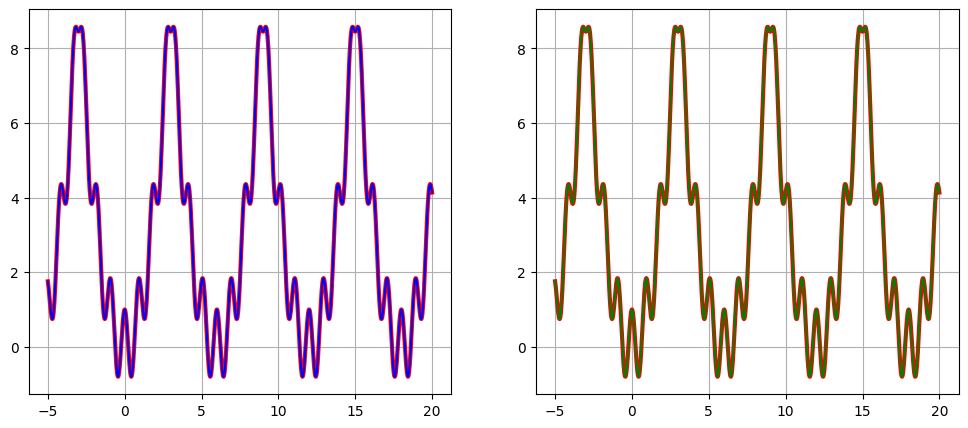

In [319]:
_, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(x_values, ef, color='red', linewidth=3)
axis[0].plot(x_values, ef_fourier, color='blue')

axis[1].plot(x_values, ef, color='red', linewidth=3)
axis[1].plot(x_values, ef_comp_fourier.real, color='green')

axis[0].grid(visible=True)
axis[1].grid(visible=True)

plt.grid(visible=True)
plt.show()

### Odd function

In [320]:
@periodically_continued(-3, 3)
def odd_function(x):
    return x ** 3

In [321]:
of = np.array([
    odd_function(x)
    for x in x_values
], dtype=np.float64)

of[:-1][np.abs(np.diff(of)) >= 10] = np.nan 

In [322]:
a_0, coeffs = compute_coefficients(odd_function, 6, h=-3, steps=21)
of_fourier = compute_furier(
    x_values, a_0, coeffs, 6
)

In [323]:
comp_coeffs = compute_comp_coefficients(
    odd_function, 6, h=-3, N=32
)
of_comp_fourier = compute_comp_fourier(
    x_values, comp_coeffs, 6
)

In [324]:
np.isclose(scipy.integrate.quad(
    lambda x: odd_function(x)**2, -3, 3
)[0], np.sum(comp_coeffs * np.conjugate(comp_coeffs)).real * 2*np.pi)

False

In [325]:
np.sum(comp_coeffs * np.conjugate(comp_coeffs)).real * 2*np.pi

625.8023312759473

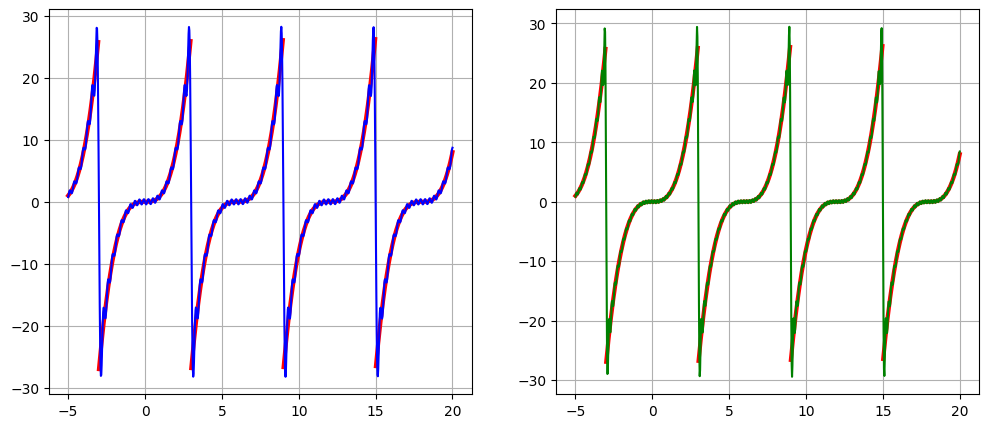

In [326]:
_, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(x_values, of, color='red', linewidth=3)
axis[0].plot(x_values, of_fourier, color='blue')

axis[1].plot(x_values, of, color='red', linewidth=3)
axis[1].plot(x_values, of_comp_fourier.real, color='green')

axis[0].grid(visible=True)
axis[1].grid(visible=True)

plt.grid(visible=True)
plt.show()

### Random function

In [327]:
@periodically_continued(t_0, t_2)
def random_function(x):
    if t_0 <= x < t_1:
        return np.log(x**2 + x)
    return np.exp((1 / 228) * x)

In [328]:
rf = np.array(
    [random_function(x) for x in x_values],
    dtype=np.float64
)
rf[:-1][np.abs(np.diff(rf)) >= 0.1] = np.nan

In [329]:
a_0, coeffs = compute_coefficients(random_function, T, h=t_0, steps=31)
rf_fourier = compute_furier(
    x_values, a_0, coeffs, T
)

/tmp/ipykernel_65021/2064797650.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_0 = ((1 / T) * scipy.integrate.quad(func, 0, 2*T)[0])


In [330]:
comp_coeffs = compute_comp_coefficients(
    random_function, T, h=t_0, N=30
)
rf_comp_fourier = compute_comp_fourier(
    x_values, comp_coeffs, T
)

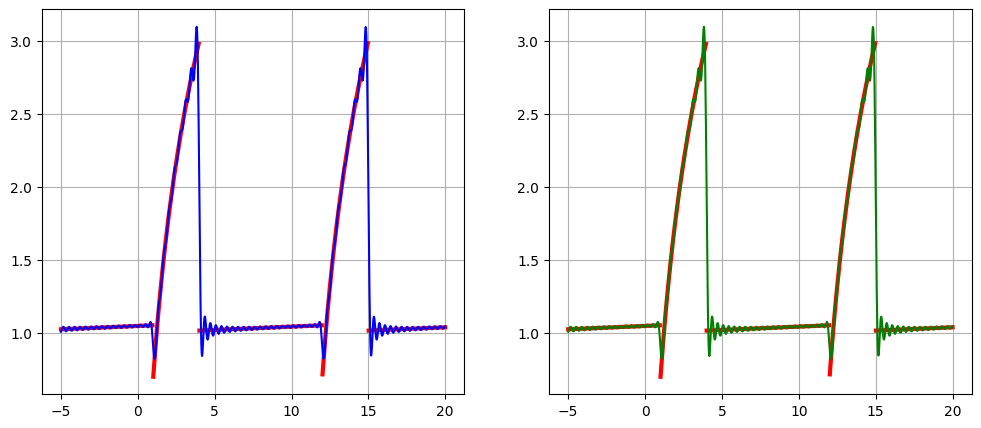

In [331]:
_, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(x_values, rf, color='red', linewidth=3)
axis[0].plot(x_values, rf_fourier, color='blue')

axis[1].plot(x_values, rf, color='red', linewidth=3)
axis[1].plot(x_values, rf_comp_fourier.real, color='green')

axis[0].grid(visible=True)
axis[1].grid(visible=True)

plt.grid(visible=True)
plt.show()

## Task 2

In [332]:
R, B = 4, 5

In [333]:
@periodically_continued(-B/8, 7*B/8)
def real_function(t):
    if -B/8 <= t < B / 8:
        return R
    elif B/8 <= t < 3*B/8:
        return 2*R - 8*R*t / B
    elif 3*B/8 <= t < 5*B/8:
        return -R
    return -6*R + 8*R*t / B

@periodically_continued(-B/8, 7*B/8)
def imag_function(t):
    if -B/8 <= t < B / 8:
        return 8*R*t / B
    elif B/8 <= t < 3*B/8:
        return R
    elif 3*B/8 <= t < 5*B/8:
        return 4*R - 8*R*t / B
    return -R

def comp_function(t):
    return real_function(t) + 1j*imag_function(t)

In [334]:
t_values = np.linspace(-B / 8, 7*B / 8, 1_000)

comp_results = np.array(
    [comp_function(t) for t in t_values],
    dtype=np.complex128
)

In [335]:
comp_coeffs = compute_comp_coefficients(
    comp_function, B, h=-B/8, N=10
)
comp_fourier = np.array(compute_comp_fourier(
    t_values, comp_coeffs, B
), dtype=np.complex128)

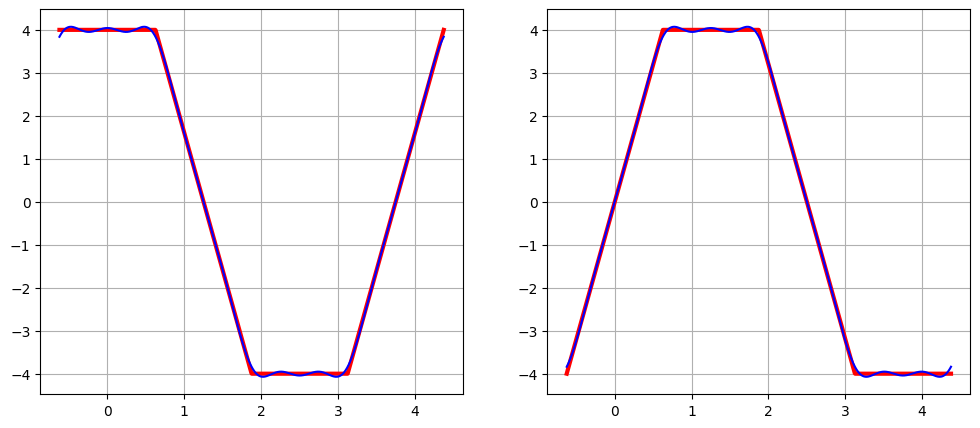

In [336]:
_, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(t_values, comp_results.real, color='red', linewidth=3)
axis[0].plot(t_values, comp_fourier.real, color='blue')

axis[1].plot(t_values, comp_results.imag, color='red', linewidth=3)
axis[1].plot(t_values, comp_fourier.imag, color='blue')

axis[0].grid(visible=True)
axis[1].grid(visible=True)

plt.grid(visible=True)
plt.show()

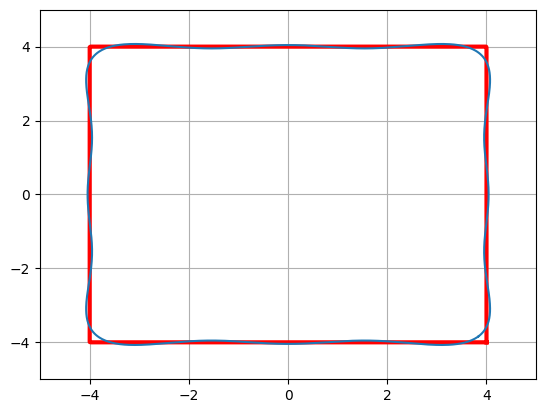

In [337]:
plt.plot(comp_results.real, comp_results.imag, color='red', linewidth=3)
plt.plot(comp_fourier.real, comp_fourier.imag)
plt.gca().set_ylim([-5, 5])
plt.gca().set_xlim([-5, 5])
plt.grid(visible=True)
plt.show()